# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier


base = pd.read_csv('base_limpa.csv')

In [50]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              16650 non-null  int64  
 1   qtd_filhos                              16650 non-null  int64  
 2   idade                                   16650 non-null  float64
 3   tempo_emprego                           16650 non-null  float64
 4   possui_celular                          16650 non-null  int64  
 5   possui_fone_comercial                   16650 non-null  int64  
 6   possui_fone                             16650 non-null  int64  
 7   possui_email                            16650 non-null  int64  
 8   qt_pessoas_residencia                   16650 non-null  float64
 9   mau                                     16650 non-null  bool   
 10  sexo_M                                  16650 non-null  in

In [51]:
X = base.drop('mau', axis=1)
y = base.mau

In [52]:
# Fazendo o train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

In [54]:
# 1 Defina um objeto com a função da árvore de decisão vista em aula.
# 2 Treine o modelo com os dados que você separou para treinamento.

clf = DecisionTreeClassifier(random_state=100).fit(X_train, y_train)
clf

DecisionTreeClassifier(random_state=100)

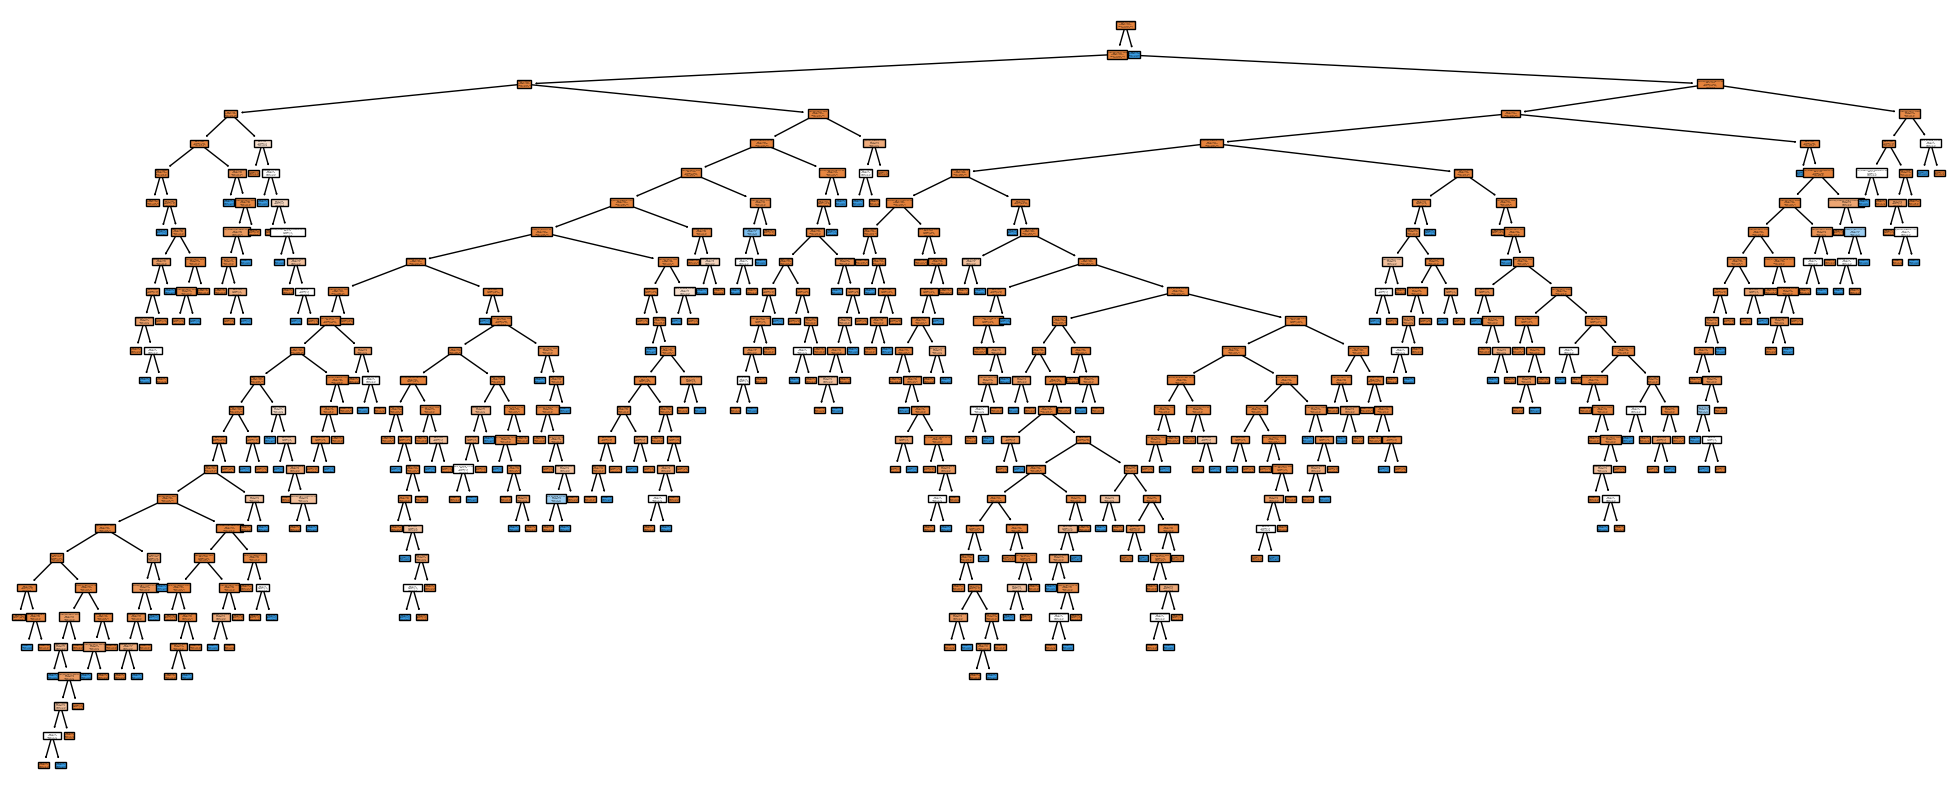

In [55]:
# 3 Visualize a árvore. Talvez você queira aumentar um pouco a figura.
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled = True,
          class_names = ['Bom', 'Mau'],
          feature_names = X_train.columns);

In [56]:
# 4 Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos 
# como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões 
# que se podem tomar com propostas de crédito.

ypredict = clf.predict(X_train)
ypredict

array([False, False, False, ..., False, False, False])

In [57]:
# Verificando o score
clf.score(X_train, y_train)

1.0

In [41]:
confusion_matrix(y_train, ypredict)

array([[11392,     0],
       [    0,   263]], dtype=int64)

C:\Users\Marina\anacond3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


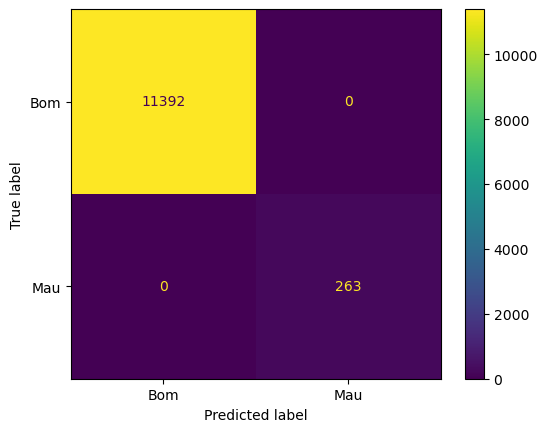

In [58]:
plot_confusion_matrix(clf, X_train, y_train, display_labels = ['Bom', 'Mau']);

In [59]:
# 5 Calcule a acurácia na base de treinamento (taxa acerto)

taxa_acerto = accuracy_score(y_train, y_predict)
taxa_acerto

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [60]:
# 1 Classifique a base de teste de acordo com a árvore que você treinou no item 2.
clf2 = DecisionTreeClassifier(random_state=100).fit(X_test, y_test)
clf2

DecisionTreeClassifier(random_state=100)

In [61]:
clf.score(X_test, y_test)

0.9791791791791792

In [62]:
# 2 Produza a visualização da matriz de confusão para a base de teste.

ypredict2 = clf.predict(X_test)
ypredict2

array([False, False, False, ..., False, False, False])

In [63]:
confusion_matrix(y_test, ypredict2)

array([[4821,   47],
       [  57,   70]], dtype=int64)

C:\Users\Marina\anacond3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


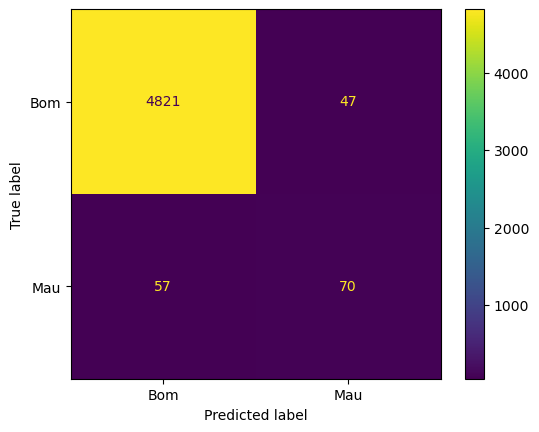

In [64]:
plot_confusion_matrix(clf, X_test,y_test, display_labels = ['Bom', 'Mau']);

In [31]:
# 3 Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.

In [65]:
taxa_acerto2 = accuracy_score(y_test, ypredict2)
taxa_acerto2

0.9791791791791792

In [66]:
# taxa de erro

taxa_erro = 1 - taxa_acerto2
taxa_erro

0.020820820820820818

C:\Users\Marina\anacond3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


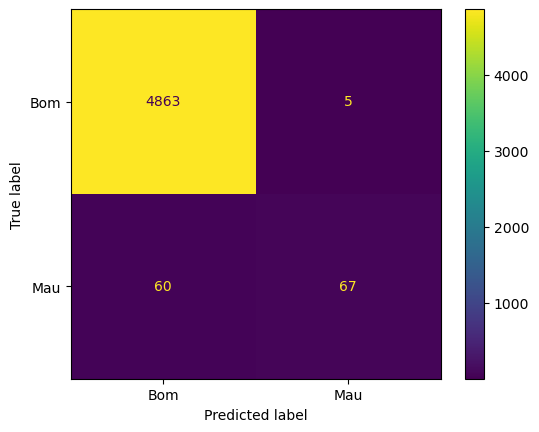

In [67]:
# 4 Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade 
# de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição 
# da predição - qual a proporção de proponentes foram classificados como 'maus'?

clf3 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123).fit(X_test,y_test)
plot_confusion_matrix(clf3, X_test,y_test, display_labels = ['Bom', 'Mau']);

In [48]:
# 4 Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.986986986986987